In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
## applying Grid Search
from sklearn.model_selection import GridSearchCV

## To split datasets in training and testing 
from sklearn.model_selection import train_test_split

## applying diff model to test
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


## correctness of each model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## to implement K-Fold
from sklearn.model_selection import KFold
#from sklearn.cross_validation import KFold
from sklearn import model_selection

## To Treat Categorial variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


## To standardize the variables
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore 

In [2]:
data=pd.read_csv("data.csv")


In [3]:
data

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,133138,14,7,2011-06-24,63107.13,False,74.85,3.804,NaN,NaN,NaN,NaN,NaN,185.791961,8.521,A,200898,25,6,2011
1,392600,42,3,2010-09-24,653.36,False,85.75,2.939,NaN,NaN,NaN,NaN,NaN,126.190033,9.199,C,39690,38,9,2010
2,299827,31,20,2011-09-30,5573.33,False,78.91,3.355,NaN,NaN,NaN,NaN,NaN,216.362033,7.852,A,203750,39,9,2011
3,140438,15,42,2010-09-24,3758.80,False,62.53,2.837,NaN,NaN,NaN,NaN,NaN,132.761933,8.099,B,123737,38,9,2010
4,344381,36,92,2011-11-25,37943.06,True,66.41,3.181,7.09,NaN,NaN,NaN,780.75,217.181253,7.716,A,39910,47,11,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,243259,25,4,2011-10-28,21337.11,False,46.28,3.569,NaN,NaN,NaN,NaN,NaN,210.691890,7.082,B,128107,43,10,2011
421566,7193,1,26,2012-01-06,4220.51,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.00,219.714258,7.348,A,151315,1,1,2012
421567,411233,44,92,2012-07-27,42308.76,False,80.42,3.537,30.51,NaN,NaN,0.41,1736.91,130.719581,5.407,C,39910,30,7,2012
421568,192924,20,34,2011-08-05,26754.53,False,77.80,3.842,NaN,NaN,NaN,NaN,NaN,208.719238,7.274,A,203742,31,8,2011


In [4]:
data['IsHoliday']=np.where(data['IsHoliday'],1,0)

In [5]:
data=pd.get_dummies(data)

In [62]:
##data=data.drop(['Temperature','Date','Unemployment','CPI','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5',],axis=1)

In [6]:
X=data[['Store','Dept','IsHoliday','Size','Week','Type_A','Type_B','Type_C']]


In [7]:
y=data['Weekly_Sales']

In [8]:
scaler = StandardScaler()
X_scales = scaler.fit_transform(X)
X_scales=pd.DataFrame(X_scales,columns=['Store','Dept','IsHoliday','Size','Week','Type_A','Type_B','Type_C'])

In [9]:
X_train, X_test , y_train , y_test = train_test_split(X_scales,y,test_size=0.25 , random_state=10)

## checking model using KNN

In [14]:
reg = KNeighborsRegressor(n_neighbors=3,n_jobs=-1)

In [15]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='uniform')

In [16]:
predict=reg.predict(X_test)

In [18]:
print(f'regression score for train data set with K=3 : {reg.score(X_train,y_train)}')

regression score for train data set with K=3 : 0.8601440927321993


In [19]:
print(f'regression score for test data set with K=3 : {reg.score(X_test,y_test)}')

regression score for test data set with K=3 : 0.5786299068632265


In [21]:
print(r2_score(y_test,predict))

0.5786299068632265


### the abive result is not good , let us try with different values of K if there is overfitting 

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[3,7,8]}

knn = KNeighborsRegressor()


model = GridSearchCV(knn, params, cv=5)
res=model.fit(X_train,y_train)

res.best_params_
res.best_estimator_
res.best_score_
res.cv_results_

## applying different methonds Linear reg , Decision Trees and Random Forest

In [23]:

lr = LinearRegression()
dt= DecisionTreeRegressor()
rf = RandomForestRegressor()
models = [lr,dt,rf]

for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(r2_score(y_test,y_pred))

0.08886082516753524
0.9630997292012835


C:\Users\Sukhmeet\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9690065715919133


### Random Forest and Decision Tree are giving good results let us test and find the best parameters

### using GridSearchCV : this method was taking quite some time to run so i have used just few features in this and rest testes later below

In [ ]:
params = {'n_estimators': [50, 60, 100] ,'max_features': ['log2', 'sqrt','auto']}



random_forest = RandomForestRegressor()


model = GridSearchCV(random_forest, param_grid=params)
res=model.fit(X_train,y_train)

In [65]:
res.best_params_

{'max_features': 'auto', 'n_estimators': 100}

In [66]:
res.best_estimator_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [67]:
res.best_score_

0.96251055462443

In [68]:
res.cv_results_

{'mean_fit_time': array([ 41.08570782,  47.57773956,  85.2541225 ,  39.90672255,
         47.95340077,  81.42344721,  77.08644342,  92.11679562,
        155.40788507]),
 'std_fit_time': array([4.15371608, 0.38445737, 1.4911974 , 0.42129487, 0.02494478,
        0.49975614, 0.77203899, 0.15923457, 0.79345948]),
 'mean_score_time': array([ 4.89436118,  5.97867672, 10.73001496,  5.34667404,  6.44000904,
        10.85334865,  5.1066738 ,  6.52334237, 10.7003483 ]),
 'std_score_time': array([0.55538662, 0.38290508, 0.1296151 , 0.18372708, 0.20510185,
        0.10873034, 0.06018495, 0.17211125, 0.22596544]),
 'param_max_features': masked_array(data=['log2', 'log2', 'log2', 'sqrt', 'sqrt', 'sqrt', 'auto',
                    'auto', 'auto'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 60, 100, 50, 60, 100, 50, 60, 100],
              mask

In [69]:
# Setting to the best combination

best_comb=res.best_estimator_

In [70]:
best_comb.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
print(best_comb.score(X_train,y_train))

0.9888707913989819


In [72]:
y_predict = best_comb.predict(X_test)

In [73]:
print(r2_score(y_test,y_predict))

0.961641005346302


## checking accuarcy of the model with diff parameters and fetching the best

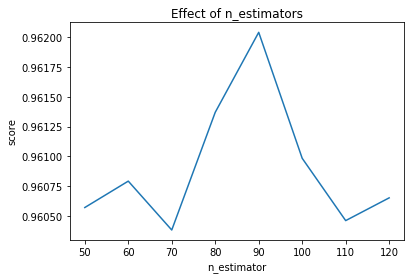

In [11]:
random_forest = RandomForestRegressor()
estimators = np.arange(50, 130, 10)
scores = []
for n in estimators:
    random_forest.set_params(n_estimators=n)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

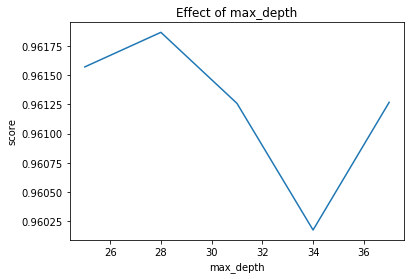

In [13]:
random_forest = RandomForestRegressor()
depths=np.arange(25, 40, 3)
scores = []
for dep in depths:
    random_forest.set_params(n_estimators=58,max_depth=dep)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(depths, scores)

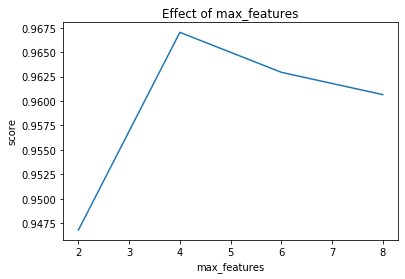

In [14]:
features=[2,4,6,8]
random_forest = RandomForestRegressor()
scores = []
for feature in features:
    random_forest.set_params(n_estimators=58,max_depth=28,max_features=feature)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of max_features")
plt.xlabel("max_features")
plt.ylabel("score")
plt.plot(features, scores)

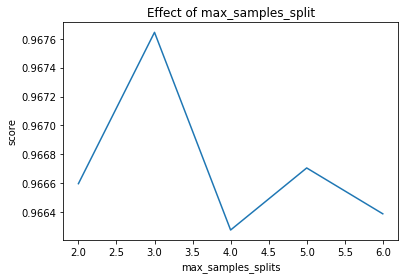

In [15]:
samples_splits=[2,3,4,5,6]
random_forest = RandomForestRegressor()
scores = []
for sample in samples_splits:
    random_forest.set_params(n_estimators=58,max_depth=28,max_features=4,min_samples_split=sample)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of max_samples_split")
plt.xlabel("max_samples_splits")
plt.ylabel("score")
plt.plot(samples_splits, scores)

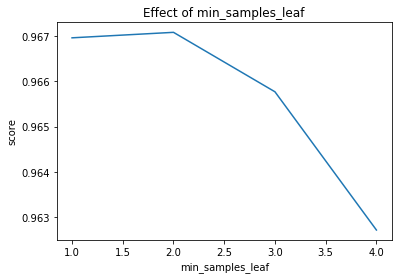

In [44]:
samples_leaf=[1,2,3,4]
random_forest = RandomForestRegressor()
scores = []
for leaf in samples_leaf:
    random_forest.set_params(n_estimators=58,max_depth=28,max_features=4,min_samples_split=3,min_samples_leaf=leaf)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.plot(samples_leaf, scores)

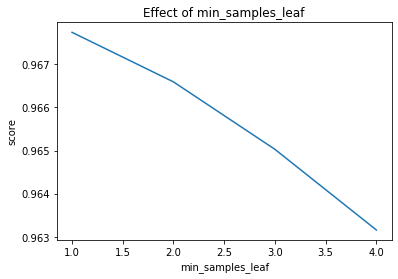

In [17]:
plt.title("Effect of min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.plot(samples_leaf, scores)

## Applying K-Fold 

## Defination of K-Folds Cross Validation
In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

scores = []

cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X_scales):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test = X_scales.values[train_index], X_scales.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    ##X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_comb.fit(X_train, y_train)
    y_predict = best_comb.predict(X_test)
    scores.append(r2_score(y_test,y_predict))
    



In [106]:
kfold = KFold(n_splits=10, random_state=100)
model_kfold = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 96.68%


In [107]:
results_kfold

array([0.96959877, 0.96638596, 0.94822622, 0.97104324, 0.97108284,
       0.96686249, 0.96877837, 0.96910803, 0.97028648, 0.96645364])

In [18]:
kfold = KFold(n_splits=10, random_state=100)
model_kfold = RandomForestRegressor(n_estimators=58, max_depth=28, max_features=4, min_samples_split=3, min_samples_leaf=1)
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 96.24%


In [10]:
rf=RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

In [21]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9885370666190293
0.9635517103303001


In [22]:
print(r2_score(y_test,y_predict))

0.9635517103303001


## Now as got good results with above selected parameters lets perform the final prediction on the testing data

In [27]:
features=pd.read_csv("features.csv")
stores=pd.read_csv('stores.csv')
sampleSubmission=pd.read_csv('sampleSubmission.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [28]:
df_test=pd.merge(features,stores,on='Store')

In [29]:
df_test=test.merge(df_test,on=['Store','Date','IsHoliday'])

In [30]:
df_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221


In [31]:
df_test['Date']=pd.to_datetime(df_test['Date'])

In [32]:
df_test['Week']=df_test.Date.dt.week
df_test['Month']=df_test.Date.dt.month
df_test['Year']=df_test.Date.dt.year


In [33]:
df_test['IsHoliday']=np.where(df_test['IsHoliday'],1,0)

In [34]:
df_test=pd.get_dummies(df_test)

In [35]:
X_test_final=df_test[['Store','Dept','IsHoliday','Size','Week','Type_A','Type_B','Type_C']]


In [36]:
scaler = StandardScaler()
X_test_scaler = scaler.fit_transform(X_test_final)
X_test_scaler=pd.DataFrame(X_test_scaler,columns=['Store','Dept','IsHoliday','Size','Week','Type_A','Type_B','Type_C'])

In [37]:
y_predict_final = rf.predict(X_test_scaler)

In [38]:
y_predict_final

array([19325.8100977 , 44284.69743966,  9372.91999384, ...,
       54309.36250575,  6398.48359257,   659.35637452])

In [41]:
test['Weekly_Sales']=y_predict_final

In [43]:
test.to_csv('final_output.csv')

In [45]:
X_test_final

,Store,Dept,IsHoliday,Size,Week,Type_A,Type_B,Type_C
0,1,1,0,151315,44,1,0,0
1,1,2,0,151315,44,1,0,0
2,1,3,0,151315,44,1,0,0
3,1,4,0,151315,44,1,0,0
4,1,5,0,151315,44,1,0,0
...,...,...,...,...,...,...,...,...
115059,45,93,0,118221,30,0,1,0
115060,45,94,0,118221,30,0,1,0
115061,45,95,0,118221,30,0,1,0
115062,45,97,0,118221,30,0,1,0


## final output stored in final_output.csv